<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** María Fernanda Amador Alvarez y Gerardo Gónzalez Flores.

**Fecha:** 14 de octubre del 2021.

**Expediente** : 725573 y 721430.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/feramdor/Proyecto_Amador_Gonzalez

# Proyecto TEMA-2

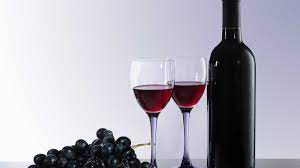


# Proyecto Módulo 2
> Se elegirá una base de datos de producción de vino tinto de la cuál se elegirán 4 variables de interés para la elaboración del proyecto.

___
## 1. Entregable.
Los trabajos deben tener los siguientes componentes básicos.

### 1.1 Vinos FlorAmor.
> Queremos ver cuanto despedicio se tendrá en la producción del vino que se presentará a continuación. 

### 1.2 Objetivo General.
> - Medir la cantidad de desperdicio que se tendrá por lote en la producción de vino. 

#### 1.2 Objetivo específico
>  - Encontrar la distribución de pH del lote de vino.
>  - Encontrar la distribución de alcohol del lote de vino.
>  - Encontrar la distribución de acidez del lote de vino.
>  - Encontrar la distribución de sulfato del lote de vino.
>  - Simulación de 10,000 escenarios para encontrar el porcentaje % de desperdicio.


### 1.3 Definición del problema.
> Se plantearán condiciones para la elección del pH, azúcar, sulfato y alcohol que contenga el vino tinto. Una vez pasadas las condiciones de estas variables, se hará la simulación para obtener el porcentaje de despercio de la producción de vino tinto. 

### 1.4 Nodos y variables que se decidieron simular y porqué
>  - PH del lote de vino.
>  - Alcohol del lote de vino.
>  - Acidez del lote de vino.
>  - Sulfato del lote de vino.



### 1.6 Obtención de bases de datos
> **[Link Base de Datos](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)**

Se busco en la página **kaggle** varias base de datos, le elección de la base de datos de **vino tinto** nos pareció más interesante por la distrución que había de las variables que elgimos y porque no son distribuciones uniformes. 


### Diagrama
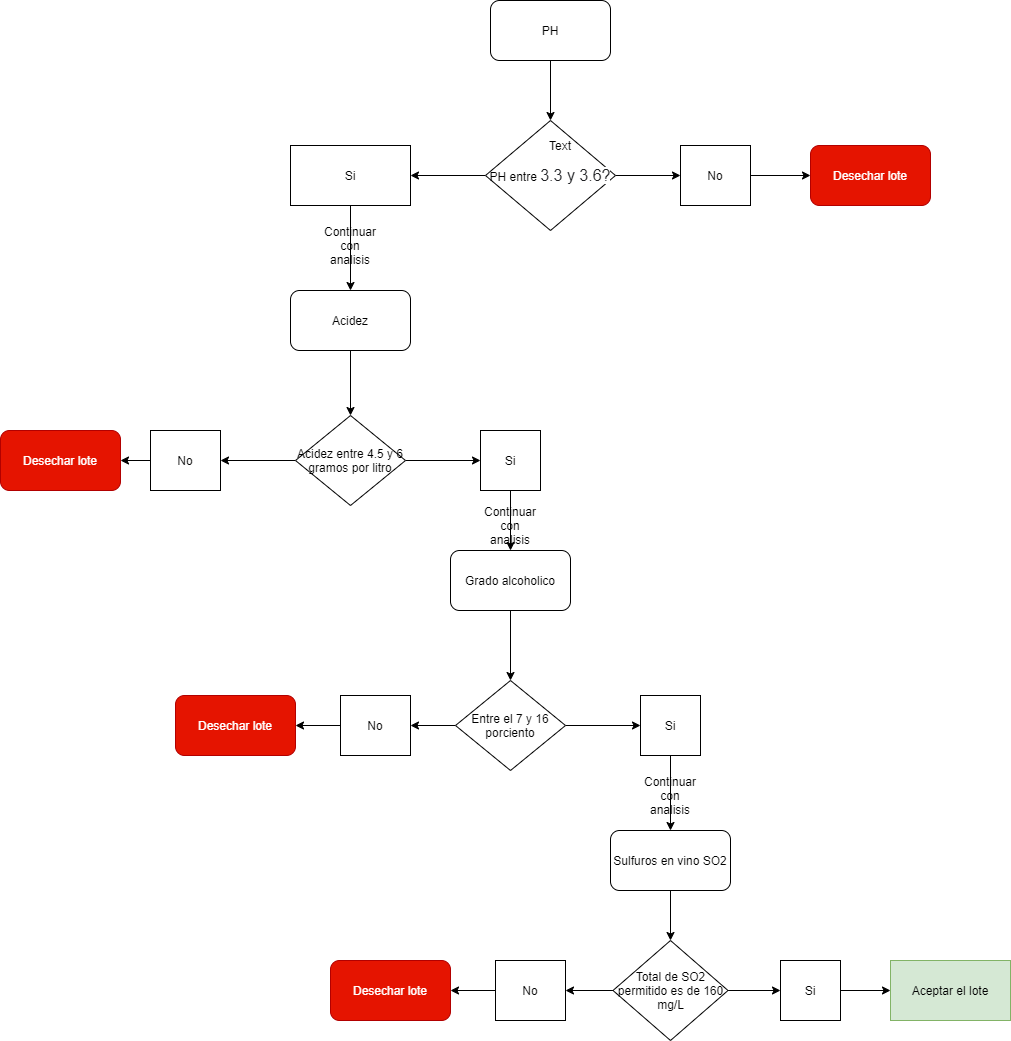

Datos que se van a usar para el análisis de nuestro data set.

In [1]:
# Importamos librerías
#Librerías:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
from dateutil.parser import parse 
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot
import itertools

In [2]:
data = pd.read_csv('winequality-red.csv').dropna()
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### Limpieza de Datos

Una vez que cargamos nuestro data set de la calidad del vino tinto, vamos a quitar las columnas que no nos sirven para solo quedarnos con las columnas que serán nuestras variables a simular para tener un aproximado del desperdicio por lote.

1. Dropeamos todas las variables excepto las de interés
2. Eliminamos todas las filas que contengan NA
3. Debido a que no encontramos ningún NA en nuestros datos, dejamos las variables de interés:
    1. Ácido Cítrico
    2. pH
    3. Sulfato
    4. Grado de Alcohol
4. Colocamos los histogramas para observar la distribución de nuestras variables de interés 

In [3]:
data = data.drop(['fixed acidity', 'volatile acidity','residual sugar', 'chlorides',
                  'free sulfur dioxide', 'total sulfur dioxide', 'density', 'quality'], axis = 1)
data

,citric acid,pH,sulphates,alcohol
0,0.00,3.51,0.56,9.4
1,0.00,3.20,0.68,9.8
2,0.04,3.26,0.65,9.8
3,0.56,3.16,0.58,9.8
4,0.00,3.51,0.56,9.4
...,...,...,...,...
1594,0.08,3.45,0.58,10.5
1595,0.10,3.52,0.76,11.2
1596,0.13,3.42,0.75,11.0
1597,0.12,3.57,0.71,10.2


In [4]:
data.describe()

,citric acid,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.270976,3.311113,0.658149,10.422983
std,0.194801,0.154386,0.169507,1.065668
min,0.000000,2.740000,0.330000,8.400000
25%,0.090000,3.210000,0.550000,9.500000
50%,0.260000,3.310000,0.620000,10.200000
75%,0.420000,3.400000,0.730000,11.100000
max,1.000000,4.010000,2.000000,14.900000


In [6]:
# pH
data_ph = data['pH'].dropna()
data_ph

0       3.51
1       3.20
2       3.26
3       3.16
4       3.51
        ... 
1594    3.45
1595    3.52
1596    3.42
1597    3.57
1598    3.39
Name: pH, Length: 1599, dtype: float64

In [7]:
# Acidez
data_a = data['citric acid'].dropna()
data_a

0       0.00
1       0.00
2       0.04
3       0.56
4       0.00
        ... 
1594    0.08
1595    0.10
1596    0.13
1597    0.12
1598    0.47
Name: citric acid, Length: 1599, dtype: float64

In [8]:
# Alcohol
data_al = data['alcohol'].dropna()
data_al

0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
1594    10.5
1595    11.2
1596    11.0
1597    10.2
1598    11.0
Name: alcohol, Length: 1599, dtype: float64

In [9]:
# Sulfato
data_s = data['sulphates'].dropna()
data_s

0       0.56
1       0.68
2       0.65
3       0.58
4       0.56
        ... 
1594    0.58
1595    0.76
1596    0.75
1597    0.71
1598    0.66
Name: sulphates, Length: 1599, dtype: float64

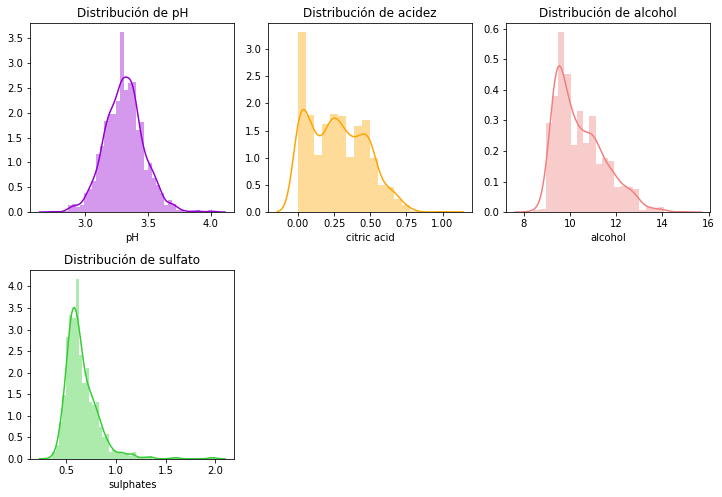

In [12]:
plt.figure(figsize = (10,10))
plt.subplot(3,3,1)
sns.distplot(data_ph ,color ='darkviolet')
plt.title('Distribución de pH')
plt.subplot(3,3,2)
sns.distplot(data_a ,color='orange')
plt.title('Distribución de acidez')
plt.subplot(3,3,3)
sns.distplot(data_al ,color='lightcoral')
plt.title('Distribución de alcohol')
plt.subplot(3,3,4)
sns.distplot(data_s ,color='limegreen')
plt.title('Distribución de sulfato')
plt.tight_layout()
plt.show()


import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [ ]:
# Funciones a usar

#Función histograma:
def plot_histogram_discrete(distribucion:'distribución a graficar histograma',
                            xlabel:'x label',
                            ylabel: 'y label',
                            title: 'title'):
    '''Función para graficar el histograma de una distribución discreta'''
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion))) 
    plt.bar(list(set(distribucion)),y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

#Prueba de intervalos de confianza
def intervalo_confianza(m:"Media de la distribución original",sim:"Variable simulada",c="Intervalo de confianza"):
    """
    Esta función crea una estimación del intervalo de confianza para la media de la variable simulada, y genera prueba de
    hipótesis, además de aceptarla o rechazarla, para una variable aleatoria normal. Imprime el intervalo de confianza para
    t-Student, normal, la media calculada de la variable simulada, una media rechazable, el estadístico de student, el valor
    de p para la prueba, la región de rechazo y el cálculo del estadístico de prueba teórico (uf!)
    """
    N = len(sim)
    i_t = st.t.interval(c, len(sim)-1, loc=np.mean(sim), scale=st.sem(sim))
    i_n = st.norm.interval(c, loc=np.mean(sim), scale=st.sem(sim))
    media_calc = np.mean(sim)
    # prueba de hipotesis para H0= mu=media2
    ho = st.ttest_1samp(sim, media_calc)
    # Calculamos el estadístico normalizado
    t = (np.mean(sim) - media_calc)/(np.std(sim) / np.sqrt(N))
    # Cálculo de la región de rechazo
    cuantil = st.t(N-1).cdf(c/2)
    print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s     ' %(c,i_t))
    print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(c,i_n))
    print('Media calculada' ,np.mean(sim))
    print('La prueba de hipótesis arroja como resultado\n',ho)
    print('Cálculo del estadístico de prueba teórico=', t)
    print(f'Región de rechazo = (t<{-cuantil}) U (t>{cuantil})')
    if ho.pvalue > c:
        print("Se acepta la hipótesis nula, la media es igual a",media_calc,"con un",c,"% de confianza.")
    else:
        print("Se rechaza la hipótesis nula. La media es diferente de",media_calc)
        
# Reducción de varianza, estratificación
def estratificacion(B = 1000):
    """
    Función estratificación: 
    Esta función crea B números aleatorios uniformes estratificados, con el propósito de reducir
    la varianza en la función aleatoria creada.
    Valor Default B es 1000. Esto quiere decir que se crearán 1000 aleatorios espaciados
    uniformemente.
    """
    i = np.arange(0,B)
    U = np.random.rand(B)
    return (U + i)/B
def estrat(a,b,N: "Cantidad de números a generar"):
    U = np.random.rand(N)
    i = np.arange(0,N)
    return (b-a)*((U + i)/N)+a
# Generación de variables aleatorias

#Función aceptación / rechazo
def a_r(f: "Función KDE",f_max: "Máximo de la función",dom: "Dominio de la función" ,N = 1000):
    """
    Función Aceptación/Rechazo. Esta función crea variables aleatorias mediante el criterio de
    aceptación rechazo, a partir de la función generada por el KDE anteriormente. Recibe la 
    función generada por el KDE, el máximo de esta función, y un vector de aleatorios uniformes.
    Se recomienda que el vector de aleatorios uniformes sea generado mediante estratificación.
    Si la función no recibe un vector de uniformes, genera uno mediante la función estratificación
    por default.
    
    """
    a = dom[0]
    b = dom[-1]
    X = np.zeros(N)
    i = 0 
    while i < N:
        R2 = np.random.uniform(0,f_max) 
        R1 = np.random.uniform(a,b,1)
        if R2 < f(R1):
            X[i] = R1
            i+=1
    return X
    

# Transformada inversa
def trans_inversa(dist, params, size):
    y_hat = dist.rvs(*params,size)
    return y_hat